In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from IPython.display import display
pd.options.display.max_columns = None

# 12. 20년 데이터와 비교

In [2]:
df20 = pd.read_csv('./dataset/players_20.csv')
df20

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [3]:
df20[['sofifa_id','short_name','age','nationality','club','overall',
      'potential','value_eur','wage_eur','international_reputation','real_face',
      'loaned_from','movement_reactions','mentality_composure']]


df20 = df20.rename(columns={'sofifa_id':'ID','short_name':'Name','age':'Age20','nationality':'Nationality',
                        'club':'Club20','overall':'Overall20','potential':'Potential20',
                        'value_eur':'Value20','wage_eur':'Wage20',
                        'player_positions':'Positions20',
                        'international_reputation':'InternationalReputation20',
                        'real_face':'RealFace20','loaned_from':'LoanedFrom20',
                        'movement_reactions':'Reactions20',
                        'mentality_composure': 'Composure20'})


df20.drop('player_url long_name dob height_cm weight_kg preferred_foot \
         weak_foot skill_moves work_rate body_type release_clause_eur player_tags \
         team_position team_jersey_number joined contract_valid_until nation_position \
         nation_jersey_number pace shooting passing dribbling defending physic gk_diving \
         gk_handling gk_kicking gk_reflexes gk_speed gk_positioning player_traits \
         attacking_crossing attacking_finishing attacking_heading_accuracy \
         attacking_short_passing attacking_volleys skill_dribbling skill_curve \
         skill_fk_accuracy skill_long_passing skill_ball_control movement_acceleration \
         movement_sprint_speed movement_agility movement_balance power_shot_power \
         power_jumping power_stamina power_strength power_long_shots mentality_aggression \
         mentality_interceptions mentality_positioning mentality_vision \
         mentality_penalties defending_marking defending_standing_tackle \
         defending_sliding_tackle goalkeeping_diving goalkeeping_handling \
         goalkeeping_kicking goalkeeping_positioning goalkeeping_reflexes ls st rs lw \
         lf cf rf rw lam cam ram lm lcm cm rcm rm lwb ldm cdm rdm rwb lb lcb cb \
         rcb rb'.split(),axis=1,inplace=True)

df20

,ID,Name,Age20,Nationality,Club20,Overall20,Potential20,Value20,Wage20,Positions20,InternationalReputation20,RealFace20,LoanedFrom20,Reactions20,Composure20
0,158023,L. Messi,32,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",5,Yes,NaN,95,96
1,20801,Cristiano Ronaldo,34,Portugal,Juventus,93,93,58500000,405000,"ST, LW",5,Yes,NaN,96,95
2,190871,Neymar Jr,27,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",5,Yes,NaN,92,94
3,200389,J. Oblak,26,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,3,Yes,NaN,88,68
4,183277,E. Hazard,28,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",4,Yes,NaN,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,Shao Shuai,22,China PR,Beijing Renhe FC,48,56,40000,2000,CB,1,No,NaN,40,41
18274,250995,Xiao Mingjie,22,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,1,No,NaN,41,35
18275,252332,Zhang Wei,19,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,1,No,NaN,52,39
18276,251110,Wang Haijian,18,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,1,No,NaN,54,40


In [4]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         18278 non-null  int64 
 1   Name                       18278 non-null  object
 2   Age20                      18278 non-null  int64 
 3   Nationality                18278 non-null  object
 4   Club20                     18278 non-null  object
 5   Overall20                  18278 non-null  int64 
 6   Potential20                18278 non-null  int64 
 7   Value20                    18278 non-null  int64 
 8   Wage20                     18278 non-null  int64 
 9   Positions20                18278 non-null  object
 10  InternationalReputation20  18278 non-null  int64 
 11  RealFace20                 18278 non-null  object
 12  LoanedFrom20               1048 non-null   object
 13  Reactions20                18278 non-null  int64 
 14  Compos

## 전처리

In [5]:
# Value20 원화로 바꿈.
df20.Value20 = df20.Value20*1300/10000
df20.Value20

0        12415000.0
1         7605000.0
2        13715000.0
3        10075000.0
4        11700000.0
            ...    
18273        5200.0
18274        5200.0
18275        5200.0
18276        5200.0
18277        5200.0
Name: Value20, Length: 18278, dtype: float64

In [6]:
# Value20로그 변환
df20['LogValue20'] = np.log1p(df20.Value20)

In [7]:
# LoanedFrom20 전처리
df20.LoanedFrom20.replace(np.nan, '0', inplace=True)
df20.LoanedFrom20[df20.LoanedFrom20!='0']='1'
df20['LoanedFrom20'] = df20['LoanedFrom20'].astype(int)

In [8]:
# RealFace20 숫자화
df20.RealFace20 = df20['RealFace20'].replace({'Yes':1,'No':0}).astype(int)

In [9]:
# 포지션 범주화
def get_category(pos):
    cat=''
    if pos.split(',')[0] in ['LS','ST','RS','LW','LF','CF','RF','RW']:
        cat = 'Foward'
    elif pos.split(',')[0] in ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']:
        cat = "Medfielder"
    elif pos.split(',')[0] in ['LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']:
        cat = 'Defender'
    else: cat = "GoalKeeper"
        
    
    return cat

df20["PositionClass20"] = df20.Positions20.apply(lambda x : get_category(x))
df20.loc[:, ['Positions20', 'PositionClass20']].head()

,Positions20,PositionClass20
0,"RW, CF, ST",Foward
1,"ST, LW",Foward
2,"LW, CAM",Foward
3,GK,GoalKeeper
4,"LW, CF",Foward


In [10]:
# 포지션 범주화
def get_category2(pos):
    cat=''
    pos = pos.split(',')[0]
    if pos in ['ST', 'CF']:
        cat = 'CF'
    elif pos in ['RS', 'RW', 'RF']:
        cat = "RF"
    elif pos in ['LS', 'LW', 'LF']:
        cat = 'LF'
    elif pos in ['CM', 'CAM', 'CDM']:
        cat = "CM"
    elif pos in ['RM', 'RCM', 'RAM', 'RDM']:
        cat = 'RM'
    elif pos in ['LM', 'LCM', 'LAM', 'LDM']:
        cat = "LM"
    elif pos in ['CB']:
        cat = 'CB'
    elif pos in ['RB', 'RCB', 'RWB']:
        cat = "RB"
    elif pos in ['LB', 'LCB', 'LWB']:
        cat = 'LB'
    else: 
        cat = "GK"
        
    return cat

df20["PositionClass2"] = df20.Positions20.apply(lambda x : get_category2(x))
df20["PositionClass2"].head()

0    RF
1    CF
2    LF
3    GK
4    LF
Name: PositionClass2, dtype: object

In [11]:
# Wage20 원화로 바꿈.
df20.Wage20 = df20.Wage20*1300/10000
df20.Wage20

0        73450.0
1        52650.0
2        37700.0
3        16250.0
4        61100.0
          ...   
18273      260.0
18274      260.0
18275      130.0
18276      130.0
18277      260.0
Name: Wage20, Length: 18278, dtype: float64

In [12]:
# Wage20 로그 변환
df20['LogWage20'] = np.log1p(df20.Wage20)
df20['LogWage20'] = df20['LogWage20']*10

In [13]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         18278 non-null  int64  
 1   Name                       18278 non-null  object 
 2   Age20                      18278 non-null  int64  
 3   Nationality                18278 non-null  object 
 4   Club20                     18278 non-null  object 
 5   Overall20                  18278 non-null  int64  
 6   Potential20                18278 non-null  int64  
 7   Value20                    18278 non-null  float64
 8   Wage20                     18278 non-null  float64
 9   Positions20                18278 non-null  object 
 10  InternationalReputation20  18278 non-null  int64  
 11  RealFace20                 18278 non-null  int32  
 12  LoanedFrom20               18278 non-null  int32  
 13  Reactions20                18278 non-null  int

## 가중치

In [14]:
# Age 가중치

df20['AgeWeight20'] = df20['Age20']

def change_value_from(x):
    out = ''
    if x in [30,31]: out = 1.375
    elif x in [29,32]: out = 1.3333
    elif x in [28,33]: out = 1.3333
    elif x in [27,34]: out = 1.3333
    elif x in [26,35]: out = 1.2917
    elif x in [25,36]: out = 1.2917
    elif x in [24,37]: out = 1.2292
    elif x in [23,38]: out = 1.2292
    elif x in [22,39]: out = 1.1458
    elif x in [21,40]: out = 1.1458
    elif x in [20,41]: out = 1.1458
    elif x in [19,42]: out = 1
    elif x in [18,43,44,45]: out = 1
    elif x in [16,17,46,47]: out = 1
    return float(out)

df20.AgeWeight20 = df20.Age20.apply(lambda x: change_value_from(x))
df20.AgeWeight20

0        1.3333
1        1.3333
2        1.3333
3        1.2917
4        1.3333
          ...  
18273    1.1458
18274    1.1458
18275    1.0000
18276    1.0000
18277    1.2917
Name: AgeWeight20, Length: 18278, dtype: float64

In [15]:
# InternationalReputation 가중치

def change(x):
    cat = ''
    if x == 1: cat = 1
    elif x == 2: cat = 1.3559
    elif x == 3: cat = 1.5424
    elif x == 4: cat = 1.678
    elif x == 5: cat = 1.8136
    return float(cat)

df20['InternationalReputationWeight20'] = df20.InternationalReputation20.apply(lambda x: change(x))

In [16]:
# RealFace 가중치

def change(x):
    cat = ''
    if x == 0: cat = 1
    elif x ==1: cat = 1.3738
    return cat

df20['RealFaceWeight20'] = df20.RealFace20.apply(lambda x: change(x))

In [17]:
# Position 가중치

def change(x):
    cat = ''
    if x == 'GoalKeeper': cat = 1
    elif x == 'Defender': cat = 1.0727
    elif x == 'Medfielder': cat = 1.0727
    elif x == 'Foward': cat = 1.1273
    return cat

df20['PositionClassWeight20'] = df20.PositionClass20.apply(lambda x: change(x))

In [18]:
# LoanedFrom 가중치

def change(x):
    cat = ''
    if x == 0: cat = 1
    elif x ==1: cat = 1.1525
    return cat

df20['LoanedFromWeight20'] = df20.LoanedFrom20.apply(lambda x: change(x))

In [19]:
# Total 컬럼 생성

df20.ReactionsTotal20 = (df20.Reactions20-61.822695035460995)/9.022620891051467*10 +50
df20.ComposureTotal20 = (df20.Composure20-58.651867984587035)/11.421006590735443*10 +50
df20.PotentialTotal20 = (df20.Potential20-71.33523203216619)/6.137250521944763*10 +50

In [20]:
df20['Total20'] = (df20.ReactionsTotal20*472 + df20.ComposureTotal20*373 + 
               df20.PotentialTotal20*381)/(472+373+381)

## 19년 팀주급표와 20년 능력치로 20년 주급 예측

In [21]:
df = pd.read_pickle('./dataset/나혼자FIFA_이적예상WAGE.pkl')
df19 = df[['ID','Club','Wage','Age','AgeWeight','InternationalReputation',
           'InternationalReputationWeight','RealFace','RealFaceWeight',
           'LoanedFrom','LoanedFromWeight','PositionClassWeight',
           'PositionClass2','Overall','Potential','LogValue','Total']]

df19 = df19.rename(columns={'Club':'Club19','Wage':'Wage19',
                        'Age':'Age19','AgeWeight':'AgeWeight19',
                        'InternationalReputation':'InternationalReputation19',
                        'InternationalReputationWeight':'InternationalReputationWeight19',
                        'RealFace':'RealFace19','RealFaceWeight':'RealFaceWeight19',
                        'LoanedFrom':'LoanedFrom19','LoanedFromWeight':'LoanedFromWeight19',
                        'PositionClassWeight':'PositionClassWeight19',
                        'PositionClass2':'PositionClass19',
                        'Overall': 'Overall19','LogValue': 'LogValue19',
                        'Total': 'Total19','Potential':'Potential19'})
df19

,ID,Club19,Wage19,Age19,AgeWeight19,InternationalReputation19,InternationalReputationWeight19,RealFace19,RealFaceWeight19,LoanedFrom19,LoanedFromWeight19,PositionClassWeight19,PositionClass19,Overall19,Potential19,LogValue19,Total19
0,158023,FC Barcelona,73450,31,1.3750,5.0,1.8136,1,1.3738,0,1.0,1.1273,RF,94,94,16.480305,85.582275
1,20801,Juventus,52650,33,1.3333,5.0,1.8136,1,1.3738,0,1.0,1.1273,CF,94,94,16.119095,85.742584
2,190871,Paris Saint-Germain,37700,26,1.2917,5.0,1.8136,1,1.3738,0,1.0,1.1273,LF,92,93,16.550203,84.116442
3,193080,Manchester United,33800,27,1.3333,4.0,1.6780,1,1.3738,0,1.0,1.0000,GK,91,93,16.051956,75.483580
4,192985,Manchester City,46150,27,1.3333,4.0,1.6780,1,1.3738,0,1.0,1.0727,RM,91,92,16.400263,80.731667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,238813,Crewe Alexandra,130,19,1.0000,1.0,1.0000,0,1.0000,0,1.0,1.0727,CM,47,65,8.962007,37.683999
17903,243165,Trelleborgs FF,130,19,1.0000,1.0,1.0000,0,1.0000,0,1.0,1.1273,CF,47,63,8.962007,32.031847
17904,241638,Cambridge United,130,16,1.0000,1.0,1.0000,0,1.0000,0,1.0,1.1273,CF,47,67,8.962007,36.777779
17905,246268,Tranmere Rovers,130,17,1.0000,1.0,1.0000,0,1.0000,0,1.0,1.1273,RF,47,66,8.962007,26.509253


In [22]:
dfClub = df[['Club','ClubWeight100','ClubWeight75','ClubWeight50',
             'ClubWeight25','ClubLogWageMean', 'ClubLogWageMedian',
             'ClubLogWageMin','ClubWageMean']]
dfClub = dfClub.drop_duplicates()

In [23]:
df20

,ID,Name,Age20,Nationality,Club20,Overall20,Potential20,Value20,Wage20,Positions20,InternationalReputation20,RealFace20,LoanedFrom20,Reactions20,Composure20,LogValue20,PositionClass20,PositionClass2,LogWage20,AgeWeight20,InternationalReputationWeight20,RealFaceWeight20,PositionClassWeight20,LoanedFromWeight20,Total20
0,158023,L. Messi,32,Argentina,FC Barcelona,94,94,12415000.0,73450.0,"RW, CF, ST",5,1,0,95,96,16.334416,Foward,RF,112.043738,1.3333,1.8136,1.3738,1.1273,1.0000,85.582275
1,20801,Cristiano Ronaldo,34,Portugal,Juventus,93,93,7605000.0,52650.0,"ST, LW",5,1,0,96,95,15.844317,Foward,CF,108.714405,1.3333,1.8136,1.3738,1.1273,1.0000,85.236223
2,190871,Neymar Jr,27,Brazil,Paris Saint-Germain,92,92,13715000.0,37700.0,"LW, CAM",5,1,0,92,94,16.434001,Foward,LF,105.374419,1.3333,1.8136,1.3738,1.1273,1.0000,82.756688
3,200389,J. Oblak,26,Slovenia,Atlético Madrid,91,93,10075000.0,16250.0,GK,3,1,0,88,68,16.125568,GoalKeeper,GK,96.959097,1.2917,1.5424,1.3738,1.0000,1.0000,74.630188
4,183277,E. Hazard,28,Belgium,Real Madrid,91,91,11700000.0,61100.0,"LW, CF",4,1,0,90,91,16.275099,Foward,LF,110.202835,1.3333,1.6780,1.3738,1.1273,1.0000,80.597772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,Shao Shuai,22,China PR,Beijing Renhe FC,48,56,5200.0,260.0,CB,1,0,0,40,41,8.556606,Defender,CB,55.645204,1.1458,1.0000,1.0000,1.0727,1.0000,28.220929
18274,250995,Xiao Mingjie,22,China PR,Shanghai SIPG FC,48,56,5200.0,260.0,CB,1,0,0,41,35,8.556606,Defender,CB,55.645204,1.1458,1.0000,1.0000,1.0727,1.0000,27.049300
18275,252332,Zhang Wei,19,China PR,Hebei China Fortune FC,48,56,5200.0,130.0,CM,1,0,0,52,39,8.556606,Medfielder,CM,48.751973,1.0000,1.0000,1.0000,1.0727,1.0000,32.808509
18276,251110,Wang Haijian,18,China PR,Shanghai Greenland Shenhua FC,48,54,5200.0,130.0,CM,1,0,0,54,40,8.556606,Medfielder,CM,48.751973,1.0000,1.0000,1.0000,1.0727,1.0000,32.915566


# 20년에 새로 등장한 신인도 예측가능

In [24]:
df1920 = pd.merge(df20, df19,on='ID',how='left')
df1920

,ID,Name,Age20,Nationality,Club20,Overall20,Potential20,Value20,Wage20,Positions20,InternationalReputation20,RealFace20,LoanedFrom20,Reactions20,Composure20,LogValue20,PositionClass20,PositionClass2,LogWage20,AgeWeight20,InternationalReputationWeight20,RealFaceWeight20,PositionClassWeight20,LoanedFromWeight20,Total20,Club19,Wage19,Age19,AgeWeight19,InternationalReputation19,InternationalReputationWeight19,RealFace19,RealFaceWeight19,LoanedFrom19,LoanedFromWeight19,PositionClassWeight19,PositionClass19,Overall19,Potential19,LogValue19,Total19
0,158023,L. Messi,32,Argentina,FC Barcelona,94,94,12415000.0,73450.0,"RW, CF, ST",5,1,0,95,96,16.334416,Foward,RF,112.043738,1.3333,1.8136,1.3738,1.1273,1.0000,85.582275,FC Barcelona,73450.0,31.0,1.3750,5.0,1.8136,1.0,1.3738,0.0,1.0,1.1273,RF,94.0,94.0,16.480305,85.582275
1,20801,Cristiano Ronaldo,34,Portugal,Juventus,93,93,7605000.0,52650.0,"ST, LW",5,1,0,96,95,15.844317,Foward,CF,108.714405,1.3333,1.8136,1.3738,1.1273,1.0000,85.236223,Juventus,52650.0,33.0,1.3333,5.0,1.8136,1.0,1.3738,0.0,1.0,1.1273,CF,94.0,94.0,16.119095,85.742584
2,190871,Neymar Jr,27,Brazil,Paris Saint-Germain,92,92,13715000.0,37700.0,"LW, CAM",5,1,0,92,94,16.434001,Foward,LF,105.374419,1.3333,1.8136,1.3738,1.1273,1.0000,82.756688,Paris Saint-Germain,37700.0,26.0,1.2917,5.0,1.8136,1.0,1.3738,0.0,1.0,1.1273,LF,92.0,93.0,16.550203,84.116442
3,200389,J. Oblak,26,Slovenia,Atlético Madrid,91,93,10075000.0,16250.0,GK,3,1,0,88,68,16.125568,GoalKeeper,GK,96.959097,1.2917,1.5424,1.3738,1.0000,1.0000,74.630188,Atlético Madrid,12220.0,25.0,1.2917,3.0,1.5424,1.0,1.3738,0.0,1.0,1.0000,GK,90.0,93.0,15.994798,74.309570
4,183277,E. Hazard,28,Belgium,Real Madrid,91,91,11700000.0,61100.0,"LW, CF",4,1,0,90,91,16.275099,Foward,LF,110.202835,1.3333,1.6780,1.3738,1.1273,1.0000,80.597772,Chelsea,44200.0,27.0,1.3333,4.0,1.6780,1.0,1.3738,0.0,1.0,1.1273,LF,91.0,91.0,16.307889,80.597772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,Shao Shuai,22,China PR,Beijing Renhe FC,48,56,5200.0,260.0,CB,1,0,0,40,41,8.556606,Defender,CB,55.645204,1.1458,1.0000,1.0000,1.0727,1.0000,28.220929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18274,250995,Xiao Mingjie,22,China PR,Shanghai SIPG FC,48,56,5200.0,260.0,CB,1,0,0,41,35,8.556606,Defender,CB,55.645204,1.1458,1.0000,1.0000,1.0727,1.0000,27.049300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18275,252332,Zhang Wei,19,China PR,Hebei China Fortune FC,48,56,5200.0,130.0,CM,1,0,0,52,39,8.556606,Medfielder,CM,48.751973,1.0000,1.0000,1.0000,1.0727,1.0000,32.808509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18276,251110,Wang Haijian,18,China PR,Shanghai Greenland Shenhua FC,48,54,5200.0,130.0,CM,1,0,0,54,40,8.556606,Medfielder,CM,48.751973,1.0000,1.0000,1.0000,1.0727,1.0000,32.915566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 대신 19년에 없는 팀은 예측 불가

In [25]:
def change_team_name(team):
    out = ''
    if team == 'Guangzhou R&F FC':
        out = 'Guangzhou R&F; FC'
        
    elif team == 'CSA - AL':
        out = 'América FC (Minas Gerais)'
        
    elif team == 'Paraná':
        out = 'Fortaleza'
        
    elif team == 'Vitória':
        out = 'Goiás'
        
    elif team == 'Sport Club do Recife':
        out = 'Avaí FC'       

    else:
        out = team

    return out

df1920.Club20 = df1920.Club20.apply(lambda x: change_team_name(x))
df1920.Club20

0                         FC Barcelona
1                             Juventus
2                  Paris Saint-Germain
3                      Atlético Madrid
4                          Real Madrid
                     ...              
18273                 Beijing Renhe FC
18274                 Shanghai SIPG FC
18275           Hebei China Fortune FC
18276    Shanghai Greenland Shenhua FC
18277           Hebei China Fortune FC
Name: Club20, Length: 18278, dtype: object

In [26]:
df_join = pd.merge(df1920, dfClub,left_on='Club20', right_on='Club')
df_join = df_join.drop_duplicates()
df_test = df_join.sort_values(by='Wage20', ascending=False)
df_test = df_test.reset_index()
df_test.drop('index',axis=1,inplace=True)
df_test

,ID,Name,Age20,Nationality,Club20,Overall20,Potential20,Value20,Wage20,Positions20,InternationalReputation20,RealFace20,LoanedFrom20,Reactions20,Composure20,LogValue20,PositionClass20,PositionClass2,LogWage20,AgeWeight20,InternationalReputationWeight20,RealFaceWeight20,PositionClassWeight20,LoanedFromWeight20,Total20,Club19,Wage19,Age19,AgeWeight19,InternationalReputation19,InternationalReputationWeight19,RealFace19,RealFaceWeight19,LoanedFrom19,LoanedFromWeight19,PositionClassWeight19,PositionClass19,Overall19,Potential19,LogValue19,Total19,Club,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25,ClubLogWageMean,ClubLogWageMedian,ClubLogWageMin,ClubWageMean
0,158023,L. Messi,32,Argentina,FC Barcelona,94,94,12415000.0,73450.0,"RW, CF, ST",5,1,0,95,96,16.334416,Foward,RF,112.043738,1.3333,1.8136,1.3738,1.1273,1.0000,85.582275,FC Barcelona,73450.0,31.0,1.3750,5.0,1.8136,1.0,1.3738,0.0,1.0,1.1273,RF,94.0,94.0,16.480305,85.582275,FC Barcelona,2.298240,2.090291,1.988824,1.622995,98.551293,96.959097,62.557500,19054.848485
1,183277,E. Hazard,28,Belgium,Real Madrid,91,91,11700000.0,61100.0,"LW, CF",4,1,0,90,91,16.275099,Foward,LF,110.202835,1.3333,1.6780,1.3738,1.1273,1.0000,80.597772,Chelsea,44200.0,27.0,1.3333,4.0,1.6780,1.0,1.3738,0.0,1.0,1.1273,LF,91.0,91.0,16.307889,80.597772,Real Madrid,2.237408,2.122623,1.980451,1.666789,98.916649,96.550903,70.656134,19763.939394
2,20801,Cristiano Ronaldo,34,Portugal,Juventus,93,93,7605000.0,52650.0,"ST, LW",5,1,0,96,95,15.844317,Foward,CF,108.714405,1.3333,1.8136,1.3738,1.1273,1.0000,85.236223,Juventus,52650.0,33.0,1.3333,5.0,1.8136,1.0,1.3738,0.0,1.0,1.1273,CF,94.0,94.0,16.119095,85.742584,Juventus,2.229949,2.039457,1.988824,1.923713,97.479676,96.959097,64.785096,17118.400000
3,194765,A. Griezmann,28,France,FC Barcelona,89,89,8970000.0,48100.0,"CF, ST, LW",4,1,0,92,89,16.009396,Foward,CF,107.810582,1.3333,1.6780,1.3738,1.1273,1.0000,79.905666,Atlético Madrid,18850.0,27.0,1.3333,4.0,1.6780,1.0,1.3738,0.0,1.0,1.0727,CM,89.0,90.0,16.131999,79.025860,FC Barcelona,2.298240,2.090291,1.988824,1.622995,98.551293,96.959097,62.557500,19054.848485
4,192985,K. De Bruyne,28,Belgium,Manchester City,91,91,11700000.0,48100.0,"CAM, CM",4,1,0,91,91,16.275099,Medfielder,CM,107.810582,1.3333,1.6780,1.3738,1.0727,1.0000,81.024468,Manchester City,46150.0,27.0,1.3333,4.0,1.6780,1.0,1.3738,0.0,1.0,1.0727,RM,91.0,92.0,16.400263,80.731667,Manchester City,2.202921,2.057838,1.980451,1.650376,95.982030,96.550903,59.687076,14737.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16032,215144,E. Insúa,28,Argentina,Panathinaikos FC,72,72,351000.0,130.0,"LB, LWB",1,0,0,70,65,12.768544,Defender,LB,48.751973,1.3333,1.0000,1.0000,1.0727,1.0000,55.516902,Panathinaikos FC,130.0,27.0,1.3333,1.0,1.0000,0.0,1.0000,0.0,1.0,1.0727,LB,72.0,73.0,12.840003,56.023263,Panathinaikos FC,1.000000,1.000000,1.000000,1.000000,48.751973,48.751973,48.751973,130.000000
16033,189300,M. Johansson,27,Sweden,Panathinaikos FC,72,73,403000.0,130.0,"RB, RWB",1,0,0,68,65,12.906694,Defender,RB,48.751973,1.3333,1.0000,1.0000,1.0727,1.0000,55.169871,Panathinaikos FC,130.0,26.0,1.2917,1.0,1.0000,0.0,1.0000,0.0,1.0,1.0727,RB,72.0,75.0,12.938443,56.182594,Panathinaikos FC,1.000000,1.000000,1.000000,1.000000,48.751973,48.751973,48.751973,130.000000
16034,186140,F. Macheda,27,Italy,Panathinaikos FC,73,74,611000.0,130.0,ST,2,0,0,68,71,13.322854,Foward,CF,48.751973,1.3333,1.3559,1.0000,1.1273,1.0000,57.274558,Panathinaikos FC,130.0,26.0,1.2917,2.0,1.3559,0.0,1.0000,0.0,1.0,1.1273,CF,71.0,72.0,12.804912,54.182583,Panathinaikos FC,1.000000,1.000000,1.000000,1.000000,48.751973,48.751973,48.751973,130.000000
16035,204675,G. Zahid,24,Norway,Panathinaikos FC,73,79,715000.0,130.0,"CAM, CM",1,0,0,69,73,13.480039,Medfielder,CM,48.751973,1.2292,1.0000,1.0000,1.0727,1.0000,60.765836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [27]:
df_test['PredictLogWage'] = 1

In [28]:
for i in range(df_test.shape[0]):
    df_test.PredictLogWage[i] = 2*(df_test.ClubWeight100[i]-1)* \
    (df_test.AgeWeight20[i]*df_test.InternationalReputationWeight20[i]* \
    df_test.RealFaceWeight20[i]*df_test.PositionClassWeight20[i]*df_test.LoanedFromWeight20[i]* \
    df_test.ClubWeight75[i]*df_test.ClubLogWageMin[i])+48.75197323201151

In [29]:
df_test['PredictLogWage1'] = df_test.PredictLogWage

In [30]:
# 선수 한 명씩 추출
for i in range(df_test.shape[0]):


    # 클럽의 최소LogWage와 최대LogWage의 배수가 1이고
    if df_test.ClubWeight100[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 100%에 속하면 능력치를 0으로 만든다. 
        if df_test.PredictLogWage[i]<=df_test[df_test.Club==df_test.Club[i]].PredictLogWage.describe()[7]:
            df_test.PredictLogWage1[i] = -20


    # 클럽의 최소LogWage와 75% LogWage의 배수가 1이고       
    if df_test.ClubWeight75[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 75%에 속하면 능력치를 0으로 만든다. 
        if df_test.PredictLogWage[i]<=df_test[df_test.Club==df_test.Club[i]].PredictLogWage.describe()[6]:
            df_test.PredictLogWage1[i] = -20


    # 클럽의 최소LogWage와 50% LogWage의 배수가 1이고
    if df_test.ClubWeight50[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 50%에 속하면 능력치를 0으로 만든다. 
        if df_test.PredictLogWage[i]<=df_test[df_test.Club==df_test.Club[i]].PredictLogWage.describe()[5]:
            df_test.PredictLogWage1[i] = -20


    # 클럽의 최소LogWage와 25% LogWage의 배수가 1이고
    if df_test.ClubWeight25[i] == 1:
        # 이 선수의 능력치가 클럽의 하위 25%에 속하면 능력치를 0으로 만든다.
        if df_test.PredictLogWage[i]<=df_test[df_test.Club==df_test.Club[i]].PredictLogWage.describe()[4]:
            df_test.PredictLogWage1[i] = -20

df_test

,ID,Name,Age20,Nationality,Club20,Overall20,Potential20,Value20,Wage20,Positions20,InternationalReputation20,RealFace20,LoanedFrom20,Reactions20,Composure20,LogValue20,PositionClass20,PositionClass2,LogWage20,AgeWeight20,InternationalReputationWeight20,RealFaceWeight20,PositionClassWeight20,LoanedFromWeight20,Total20,Club19,Wage19,Age19,AgeWeight19,InternationalReputation19,InternationalReputationWeight19,RealFace19,RealFaceWeight19,LoanedFrom19,LoanedFromWeight19,PositionClassWeight19,PositionClass19,Overall19,Potential19,LogValue19,Total19,Club,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25,ClubLogWageMean,ClubLogWageMedian,ClubLogWageMin,ClubWageMean,PredictLogWage,PredictLogWage1
0,158023,L. Messi,32,Argentina,FC Barcelona,94,94,12415000.0,73450.0,"RW, CF, ST",5,1,0,95,96,16.334416,Foward,RF,112.043738,1.3333,1.8136,1.3738,1.1273,1.0000,85.582275,FC Barcelona,73450.0,31.0,1.3750,5.0,1.8136,1.0,1.3738,0.0,1.0,1.1273,RF,94.0,94.0,16.480305,85.582275,FC Barcelona,2.298240,2.090291,1.988824,1.622995,98.551293,96.959097,62.557500,19054.848485,1320,1320
1,183277,E. Hazard,28,Belgium,Real Madrid,91,91,11700000.0,61100.0,"LW, CF",4,1,0,90,91,16.275099,Foward,LF,110.202835,1.3333,1.6780,1.3738,1.1273,1.0000,80.597772,Chelsea,44200.0,27.0,1.3333,4.0,1.6780,1.0,1.3738,0.0,1.0,1.1273,LF,91.0,91.0,16.307889,80.597772,Real Madrid,2.237408,2.122623,1.980451,1.666789,98.916649,96.550903,70.656134,19763.939394,1334,1334
2,20801,Cristiano Ronaldo,34,Portugal,Juventus,93,93,7605000.0,52650.0,"ST, LW",5,1,0,96,95,15.844317,Foward,CF,108.714405,1.3333,1.8136,1.3738,1.1273,1.0000,85.236223,Juventus,52650.0,33.0,1.3333,5.0,1.8136,1.0,1.3738,0.0,1.0,1.1273,CF,94.0,94.0,16.119095,85.742584,Juventus,2.229949,2.039457,1.988824,1.923713,97.479676,96.959097,64.785096,17118.400000,1265,1265
3,194765,A. Griezmann,28,France,FC Barcelona,89,89,8970000.0,48100.0,"CF, ST, LW",4,1,0,92,89,16.009396,Foward,CF,107.810582,1.3333,1.6780,1.3738,1.1273,1.0000,79.905666,Atlético Madrid,18850.0,27.0,1.3333,4.0,1.6780,1.0,1.3738,0.0,1.0,1.0727,CM,89.0,90.0,16.131999,79.025860,FC Barcelona,2.298240,2.090291,1.988824,1.622995,98.551293,96.959097,62.557500,19054.848485,1225,1225
4,192985,K. De Bruyne,28,Belgium,Manchester City,91,91,11700000.0,48100.0,"CAM, CM",4,1,0,91,91,16.275099,Medfielder,CM,107.810582,1.3333,1.6780,1.3738,1.0727,1.0000,81.024468,Manchester City,46150.0,27.0,1.3333,4.0,1.6780,1.0,1.3738,0.0,1.0,1.0727,RM,91.0,92.0,16.400263,80.731667,Manchester City,2.202921,2.057838,1.980451,1.650376,95.982030,96.550903,59.687076,14737.272727,1023,1023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16032,215144,E. Insúa,28,Argentina,Panathinaikos FC,72,72,351000.0,130.0,"LB, LWB",1,0,0,70,65,12.768544,Defender,LB,48.751973,1.3333,1.0000,1.0000,1.0727,1.0000,55.516902,Panathinaikos FC,130.0,27.0,1.3333,1.0,1.0000,0.0,1.0000,0.0,1.0,1.0727,LB,72.0,73.0,12.840003,56.023263,Panathinaikos FC,1.000000,1.000000,1.000000,1.000000,48.751973,48.751973,48.751973,130.000000,48,-20
16033,189300,M. Johansson,27,Sweden,Panathinaikos FC,72,73,403000.0,130.0,"RB, RWB",1,0,0,68,65,12.906694,Defender,RB,48.751973,1.3333,1.0000,1.0000,1.0727,1.0000,55.169871,Panathinaikos FC,130.0,26.0,1.2917,1.0,1.0000,0.0,1.0000,0.0,1.0,1.0727,RB,72.0,75.0,12.938443,56.182594,Panathinaikos FC,1.000000,1.000000,1.000000,1.000000,48.751973,48.751973,48.751973,130.000000,48,-20
16034,186140,F. Macheda,27,Italy,Panathinaikos FC,73,74,611000.0,130.0,ST,2,0,0,68,71,13.322854,Foward,CF,48.751973,1.3333,1.3559,1.0000,1.1273,1.0000,57.274558,Panathinaikos FC,130.0,26.0,1.2917,2.0,1.3559,0.0,1.0000,0.0,1.0,1.1273,CF,71.0,72.0,12.804912,54.182583,Panathinaikos FC,1.000000,1.000000,1.000000,1.000000,48.751973,48.751973,48.751973,130.000000,48,-20
16035,204675,G. Zahid,24,Norway,Panathinaikos FC,73,79,715000.0,130.0,"CAM, CM",1,0,0,69,73,13.48

In [31]:
for i in range(df_test.shape[0]):
    df_test.PredictLogWage1[i]=df_test.PredictLogWage1[i]-(df_test.Total20.max()-df_test.Total20[i])*7 \
                            -(df_test.LogValue20.max()-df_test.LogValue20[i])*10

<Figure size 1440x360 with 0 Axes>

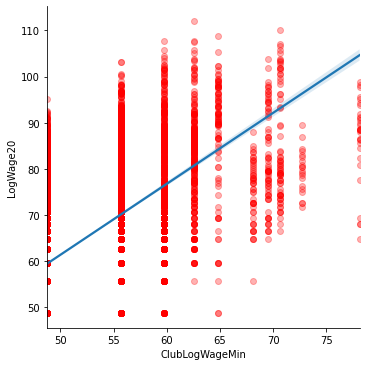

In [32]:
fig = plt.figure(figsize=(20,5))

sns.lmplot(data=df_test, x='ClubLogWageMin', y='LogWage20', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

<Figure size 1440x1440 with 0 Axes>

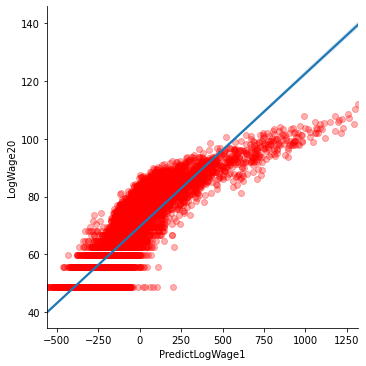

In [33]:
fig = plt.figure(figsize=(20,20))

sns.lmplot(data=df_test, x='PredictLogWage1', y='LogWage20', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

In [34]:
df_final = df_test[['LogWage20','AgeWeight20', 'InternationalReputation20',
                    'RealFace20','LoanedFrom20', 'PositionClassWeight20',
                    'Overall20', 'LogValue20', 'PredictLogWage1',
                    'ClubLogWageMean',
                    'ClubWeight100', 'ClubWeight75', 'ClubWeight50', 
                    'ClubWeight25']]

df_final = df_final.rename(columns={'LogWage20':'LogWage','AgeWeight20':'AgeWeight',
                        'InternationalReputation20':'InternationalReputation',
                        'RealFace20':'RealFace','LoanedFrom20':'LoanedFrom',
                        'PositionClassWeight20':'PositionClassWeight',
                        'Overall20':'Overall','LogValue20':'LogValue'})
df_final

,LogWage,AgeWeight,InternationalReputation,RealFace,LoanedFrom,PositionClassWeight,Overall,LogValue,PredictLogWage1,ClubLogWageMean,ClubWeight100,ClubWeight75,ClubWeight50,ClubWeight25
0,112.043738,1.3333,5,1,0,1.1273,94,16.334416,1319,98.551293,2.298240,2.090291,1.988824,1.622995
1,110.202835,1.3333,4,1,0,1.1273,91,16.275099,1297,98.916649,2.237408,2.122623,1.980451,1.666789
2,108.714405,1.3333,5,1,0,1.1273,93,15.844317,1256,97.479676,2.229949,2.039457,1.988824,1.923713
3,107.810582,1.3333,4,1,0,1.1273,89,16.009396,1181,98.551293,2.298240,2.090291,1.988824,1.622995
4,107.810582,1.3333,4,1,0,1.0727,91,16.275099,989,95.982030,2.202921,2.057838,1.980451,1.650376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16032,48.751973,1.3333,1,0,0,1.0727,72,12.768544,-267,48.751973,1.000000,1.000000,1.000000,1.000000
16033,48.751973,1.3333,1,0,0,1.0727,72,12.906694,-268,48.751973,1.000000,1.000000,1.000000,1.000000
16034,48.751973,1.3333,2,0,0,1.1273,73,13.322854,-249,48.751973,1.000000,1.000000,1.000000,1.000000
16035,48.751973,1.2292,1,0,0,1.0727,73,13.480039,-223,48.751973,1.000000,1.000000,1.000000,1.000000


# 신인

In [58]:
df_test.Club19.isnull().sum()

3272

# 팀, WAGE 모두 그대로 그룹

In [42]:
len(df_test[df_test.Club19==df_test.Club20][df_test.Wage19==df_test.Wage20])

3838

# 팀 그대로 WAGE는 다른 그룹

In [43]:
len(df_test[df_test.Club19==df_test.Club20][df_test.Wage19!=df_test.Wage20])

5201

# 이적 선수

In [66]:
len(df_test[df_test.Club19!=df_test.Club20])-df_test.Club19.isnull().sum()

3726

In [38]:
# ***Regressor 로 모델 비교. # 연속형데이터 예측할 수 있는 모델. 
# 예측모델임. 정량적 예측모델  비교임 (ex 국어점수로 수학점수 예측하고 막 그런거)

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor


Y_train = df['LogWage']
X_train = df[['AgeWeight', 'InternationalReputation', 'RealFace', 
             'LoanedFrom', 'PositionClassWeight',
             'Overall', 'LogValue', 'PredictLogWage1',
             'ClubLogWageMean',
             'ClubWeight100', 'ClubWeight75', 'ClubWeight50', 
             'ClubWeight25']]



Y_test = df_final['LogWage']
X_test = df_final[['AgeWeight', 'InternationalReputation', 'RealFace', 
             'LoanedFrom', 'PositionClassWeight',
             'Overall', 'LogValue', 'PredictLogWage1',
             'ClubLogWageMean',
             'ClubWeight100', 'ClubWeight75', 'ClubWeight50', 
             'ClubWeight25']]

print('===============================')
RandomForest = RandomForestRegressor(n_estimators=700,criterion='mse').fit(X_train,Y_train)
print(RandomForest)
rf_pred = RandomForest.predict(X_test)
mse = mean_squared_error(Y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, rf_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))



print('===============================')
LGBM = LGBMRegressor(colsample_bytree=0.6, learning_rate=0.2, max_depth=5,
              n_estimators=3000, num_leaves=5, reg_lambda=10, subsample=0.8).fit(X_train,Y_train)

print(LGBM)
lg_pred = LGBM.predict(X_test)
mse = mean_squared_error(Y_test, lg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, lg_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))



print('===============================')
XGB = XGBRegressor(colsample_bylevel=0.7, colsample_bytree=0.7, max_depth=5,
             n_estimators=2000, subsample=0.8).fit(X_train,Y_train)


print(XGB)
xg_pred = XGB.predict(X_test)
mse = mean_squared_error(Y_test, xg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, xg_pred)
print('로그 변환된 MSE:  ', np.round(mse,3))
print('로그 변환된 RMSE: ', np.round(rmse,3))
print('결정계수 R2:      ', np.round(r2,3))

RandomForestRegressor(n_estimators=700)
로그 변환된 MSE:   12.202
로그 변환된 RMSE:  3.493
결정계수 R2:       0.921
LGBMRegressor(colsample_bytree=0.6, learning_rate=0.2, max_depth=5,
              n_estimators=3000, num_leaves=5, reg_lambda=10, subsample=0.8)
로그 변환된 MSE:   10.874
로그 변환된 RMSE:  3.298
결정계수 R2:       0.93
[11:06:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(colsample_bylevel=0.7, colsample_bytree=0.7, max_depth=5,
             n_estimators=2000, subsample=0.8)
로그 변환된 MSE:   10.965
로그 변환된 RMSE:  3.311
결정계수 R2:       0.929



LGBMRegressor(colsample_bytree=0.6, learning_rate=0.2, max_depth=5,
              n_estimators=3000, num_leaves=5, reg_lambda=10, subsample=0.8)
로그 변환된 MSE:   10.734
로그 변환된 RMSE:  3.276
결정계수 R2:       0.932

[11:15:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(colsample_bylevel=0.7, colsample_bytree=0.7, max_depth=5,
             n_estimators=2000, subsample=0.8)
로그 변환된 MSE:   10.795
로그 변환된 RMSE:  3.286
결정계수 R2:       0.932

In [ ]:
# 변수 중요도 시각화.
DecisionTree = DecisionTreeRegressor(max_depth=1000)
DecisionTree.fit(X_train, Y_train)

fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=4)
importance_df = pd.DataFrame()

models = [DecisionTree, RandomForest, LGBM, XGB]


for i_num, model in enumerate(models):
    feature_series = pd.Series(data=model.feature_importances_,index=X_train.columns)
    colname = str(model)
    importance_df[colname] = feature_series
    feature_series = feature_series.sort_values(ascending=False)
    axs[i_num].set_title(colname)
    sns.barplot(x=feature_series.values, y=feature_series.index, ax=axs[i_num])

In [ ]:
# 일대일 결과 확인

df_Y_test1 = pd.DataFrame(Y_test)
df_predictions1 = pd.DataFrame(lg_pred , columns=['Predictions'])
df_NationalityClubName = df_test[['Nationality','Club','Name']]

df_Y_test1.LogWage= np.expm1(df_Y_test1.LogWage/10)
df_predictions1.Predictions= np.expm1(df_predictions1.Predictions/10)

df_Y_test1 = df_Y_test1.astype(int)
df_predictions1 = df_predictions1.astype(int)


Y_test_predictions = pd.concat([df_NationalityClubName  ,df_Y_test1, df_predictions1],axis=1)
Y_test_predictions = Y_test_predictions.rename(columns={'LogWage':'Wage'})

# 모두 표시
Y_test_predictions.T

In [ ]:
# 산점도로 결과 확인

fig = plt.figure(figsize=(20,5))

sns.lmplot(data=Y_test_predictions, x='Predictions', y='Wage', order=1,\
           scatter_kws={'alpha':0.3, 'color':'r'} )

# 이적금액 예측

# Wage만 19년도 데이터이고

# 나머지는 모두 20년 데이터이다.

In [ ]:
df_test.columns

In [ ]:
df = df_test[['Name','Age20','Nationality','Overall20','Potential20','Club19',
         'Club20','Value20','Wage19','Wage20','AgeWeight20','InternationalReputation20',
         'InternationalReputationWeight20','RealFace20','RealFaceWeight20',
         'LoanedFrom20','LoanedFromWeight20','PositionClassWeight20',
         'LogValue20','Total20','PositionClass2','ClubWeight100','ClubWeight75',
         'ClubWeight50','ClubWeight25','ClubLogWageMean','ClubLogWageMedian',
         'ClubLogWageMin','PredictLogWage','PredictLogWage1','ClubWageMean']]

In [ ]:
df = df.rename(columns={'Age20':'Age','Overall20':'Overall','Potential20':'Potential',
                       'Value20':'Value','ClubWageMean':'ClubWageMean19',
                       'AgeWeight20':'AgeWeight','InternationalReputation20':'InternationalReputation',
                       'InternationalReputationWeight20':'InternationalReputationWeight',
                       'RealFace20':'RealFace','RealFaceWeight20':'RealFaceWeight',
                       'LoanedFrom20':'LoanedFrom','LoanedFromWeight20':'LoanedFromWeight',
                       'PositionClassWeight20':'PositionClassWeight','LogValue20':'LogValue',
                       'Total20':'Total'})

## 선수 검색

In [ ]:
def search(nationality, team):
    return df[df.Nationality==nationality][df.Club20==team] \
            [['Name','Age','Nationality','Club20','Wage20','Club19','Wage19',
              'ClubWageMean19','Overall','Potential','PositionClass2']]

## 주전 선수로 뛸 가능성이 있는 팀을

## 팀 주급 총액 순으로 정렬해서 표시

- 현재의 능력을 나타내는 Overall 수치와
- 미래의 능력을 나타내는 Potential(나이도 포함) 수치 모두를 반영.

In [ ]:
def best11(player):
    name = df[df.Name==player]
    position = name.PositionClass2.values[0]
    clubs = df[df.PositionClass2.values==position].Club20.unique()
    teams = []
    for club in clubs:
        if name.Overall.values>=df[df.Club20==club][df[df.Club20==club].PositionClass2==position].Overall.max():
            if name.Potential.values>=df[df.Club20==club][df[df.Club20==club].PositionClass2==position].Potential.max():
                teams.append(club)
    df_teams = pd.DataFrame(teams , columns=['Club20'])
    df_join = df[['Club20','ClubWageMean19']]
    df_best11 = pd.merge(df_teams, df_join,on='Club20')
    df_best11 = df_best11.drop_duplicates()
    df_best11 = df_best11.sort_values(by='ClubWageMean19', ascending=False)
    df_best11 = df_best11.reset_index()
    df_best11.drop('index',axis=1,inplace=True)
    print('주전 가능한 팀의 수: ', len(df_best11))
    return df_best11.T

## 팀 엔트리에 포함가능한 팀을

## 팀 주급 총액 순으로 정렬해서 표시

In [ ]:
def entry33(player):
    name = df[df.Name==player]
    position = name.PositionClass2.values[0]
    clubs = df[df.PositionClass2.values==position].Club20.unique()
    teams = []
    for club in clubs:
        if name.Overall.values>df[df.Club20==club][df[df.Club20==club].PositionClass2==position].Overall.min():
            if name.Potential.values>df[df.Club20==club][df[df.Club20==club].PositionClass2==position].Potential.min():
                teams.append(club)
    df_teams = pd.DataFrame(teams , columns=['Club20'])
    df_join = df[['Club20','ClubWageMean19']]
    df_entry33 = pd.merge(df_teams, df_join,on='Club20')
    df_entry33 = df_entry33.drop_duplicates()
    df_entry33 = df_entry33.sort_values(by='ClubWageMean19', ascending=False)
    df_entry33 = df_entry33.reset_index()
    df_entry33.drop('index',axis=1,inplace=True)
    print('엔트리 포함 가능한 팀의 수: ', len(df_entry33))
    return df_entry33.T

## 이적시 예상 주급을 현재 팀과
## 이적 팀을 비교하여 표시

In [ ]:
def transfer(name, nextClub):
    
    # 팀주급표
    dfClub = df[['Club20','ClubWageMean19','ClubLogWageMean','ClubLogWageMin',
             'ClubWeight100','ClubWeight75','ClubWeight50', 'ClubWeight25']]
    dfClub = dfClub.rename(columns={'Club20':'TransferClub'})
    dfClub = dfClub.drop_duplicates()
    dfClub = dfClub.sort_values(by='ClubWageMean19', ascending=False)
    dfClub = dfClub.reset_index()
    dfClub.drop('index',axis=1,inplace=True)
    
    # 이적할 팀주급표 추출
    dfPlayerClub = dfClub[dfClub.TransferClub==nextClub].reset_index()
    dfPlayerClub.drop('index',axis=1,inplace=True)
    
    # 선수능력표
    dfAbility = df[['Name','Club19','Wage19','Club20','Wage20','AgeWeight',
                    'InternationalReputation','InternationalReputationWeight',
                    'RealFace','RealFaceWeight','LoanedFrom','LoanedFromWeight',
                    'PositionClassWeight','PositionClass2','Overall',
                    'LogValue','Total']]
    
    dfAbility = dfAbility.rename(columns={'Club19':'LastClub',
                                         'Club20':'CurrentClub'})
    
    # 해당 선수능력표 추출
    dfPlayer = dfAbility[dfAbility.Name==name].reset_index()
    dfPlayer.drop('index',axis=1,inplace=True)
    
    # 선수능력표+이적할 팀주급표
    dfJoin = pd.concat([dfPlayer, dfPlayerClub],axis=1)
    
    # 공식에 적용
    dfJoin['PredictLogWage'] = 1
    for i in range(dfJoin.shape[0]):
        dfJoin.PredictLogWage[i] = 2*(dfJoin.ClubWeight100[i]-1)* \
        (dfJoin.AgeWeight[i]*dfJoin.InternationalReputationWeight[i]* \
        dfJoin.RealFaceWeight[i]*dfJoin.PositionClassWeight[i]* \
        dfJoin.LoanedFromWeight[i]*dfJoin.ClubWeight75[i]*dfJoin.ClubLogWageMin[i]) \
        +48.75197323201151
    
    dfJoin['PredictLogWage1'] = dfJoin.PredictLogWage
    
        # (팀 최대LogWage/전체 축구선수 최저 LogWage)가 1이고
    if dfClub[dfClub.TransferClub==nextClub].ClubWeight100.values == 1:
        # 이 선수의 능력치가 클럽의 하위 100%(전체)에 속하면 능력치를 -20으로 만든다. 
        if dfJoin.PredictLogWage.values<=df[df.Club20==nextClub].PredictLogWage.describe()[7]:
            dfJoin.PredictLogWage1 = -20
    

    # (팀 하위 75% 선수의 LogWage/전체 축구선수 최저 LogWage)가 1이고       
    if dfClub[dfClub.TransferClub==nextClub].ClubWeight75.values == 1:
        # 이 선수의 능력치가 클럽의 하위 75%에 속하면 능력치를 -20으로 만든다. 
        if dfJoin.PredictLogWage.values<=df[df.Club20==nextClub].PredictLogWage.describe()[6]:
            dfJoin.PredictLogWage1 = -20

    
    # (팀 하위 50% 선수의 LogWage/전체 축구선수 최저 LogWage)가 1이고  
    if dfClub[dfClub.TransferClub==nextClub].ClubWeight50.values == 1:
        # 이 선수의 능력치가 클럽의 하위 50%에 속하면 능력치를 -20으로 만든다. 
        if dfJoin.PredictLogWage.values<=df[df.Club20==nextClub].PredictLogWage.describe()[5]:
            dfJoin.PredictLogWage1 = -20
            
    
    ## (팀 하위 25% 선수의 LogWage/전체 축구선수 최저 LogWage)가 1이고  
    if dfClub[dfClub.TransferClub==nextClub].ClubWeight25.values == 1:
        # 이 선수의 능력치가 클럽의 하위 25%에 속하면 능력치를 -20으로 만든다.
        if dfJoin.PredictLogWage.values<=df[df.Club20==nextClub].PredictLogWage.describe()[4]:
            dfJoin.PredictLogWage1 = -20
            
    dfJoin.PredictLogWage1 = dfJoin.PredictLogWage1.values \
                         -(df.Total.max()-dfJoin.Total.values)*7 \
                         -(df.LogValue.max()-dfJoin.LogValue.values)*10
    
    # 예측
    X_test = dfJoin[['AgeWeight', 'InternationalReputation', 'RealFace', 
             'LoanedFrom', 'PositionClassWeight',
             'Overall', 'LogValue', 'PredictLogWage1',
             'ClubLogWageMean',
             'ClubWeight100', 'ClubWeight75', 'ClubWeight50',
             'ClubWeight25']]

    
    xg_pred = XGB.predict(X_test)

    dfJoin['PredictWage20'] = np.expm1(xg_pred/10).astype(int)
    dfJoin['Difference19'] = dfJoin.PredictWage20-dfJoin.Wage19
    result = dfJoin[['Name','LastClub','Wage19','CurrentClub',
                     'TransferClub','PredictWage20','Difference19']]
    
    return result

# 11. 함수 호출

In [ ]:
np.sort(df.Nationality.unique())

In [ ]:
np.sort(df.Club20.unique())

In [ ]:
print(len(df[df.Nationality=='Korea Republic'][['Name','Club20']]))
df[df.Nationality=='Korea Republic'][['Name','Club20']].T

- 1.Cheon Seong-Hoon
- 2.Ki Sung Yueng
- 3.Lee Chung Yong

In [ ]:
search('Korea Republic', 'VfL Bochum 1848')

In [ ]:
best11('Park Chu Young')

In [ ]:
entry33('Cheon Seong-Hoon')

In [ ]:
transfer('Park Chu Young', "Ceará Sporting Club")

### 2.H. Son

In [ ]:
search('Korea Republic', 'Tottenham Hotspur')

In [ ]:
best11('H. Son')

In [ ]:
transfer('H. Son', "Manchester United")

In [ ]:
끝